# Importing libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn import preprocessing
from sklearn.cluster import *
from sklearn.mixture import *
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
%matplotlib inline

# Load dataset

In [4]:
data = pd.read_csv('C:\\Users\\Asus\\OneDrive\\Desktop\\Jayesh_ML\\Single_Molecule_Event_Classification\\Data_set\\Enro_25.csv',low_memory=False)
data.head()

,Trace,Search,Level,State,Event_Start_Time_(ms),Event_End_Time_(ms),Amplitude_(pA),Amp_SD_(pA),Dwell_Time_(ms),Inst_Freq_(Hz),Interevent_Interval_(ms)
0,1,1,1,AB,4375.240234,4375.399902,-11.355690,0.000000,0.1598,NaN,Not found
1,1,1,2,A,4375.399902,4375.939941,-19.771412,0.593518,0.5400,NaN,Not found
2,1,1,1,A,4375.939941,4377.680176,-9.568746,0.680542,1.7402,1428.979736,0.699800014
3,1,1,0,A,4377.680176,4378.359863,0.335227,1.368883,0.6798,NaN,Not found
4,1,1,1,A,4378.359863,4381.939941,-9.637775,1.160743,3.5800,413.223144,2.420000076


# Data Cleaning

In [5]:
# Removing null vales from the dataset
data.dropna(subset = ["Inst_Freq_(Hz)"], inplace=True)

# transforming the datatype from object to numeric
data['Interevent_Interval_(ms)'] = pd.to_numeric(data['Interevent_Interval_(ms)'])

# data.head()
# data.dtypes
# data.shape

# Data Vizualization 

####################################################################################################

Scatter plot of all the important features

####################################################################################################


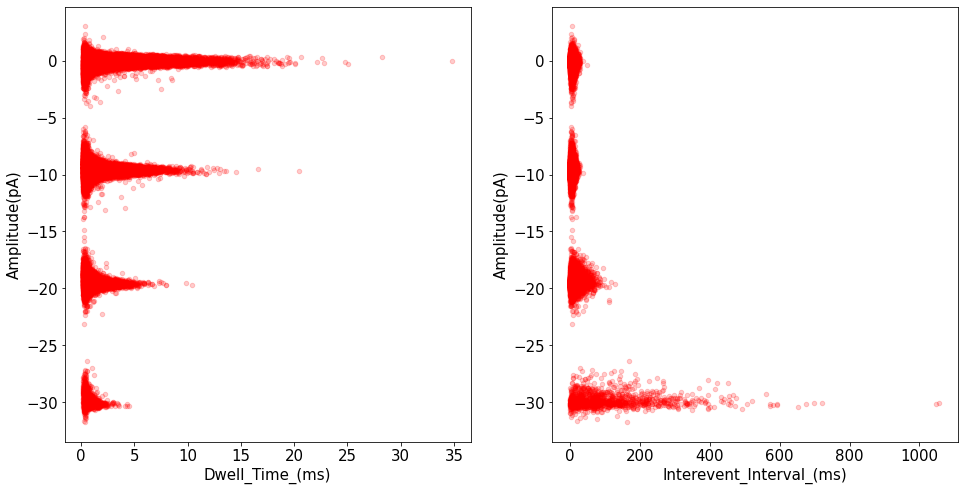

In [7]:
# Cosmetics
print('#'*100)
print()
print('Scatter plot of all the important features')
print()
print('#'*100)


features = ['Dwell_Time_(ms)','Interevent_Interval_(ms)']

# Figure cosmetics
fig, axs = plt.subplots(1,len(features), figsize=(16,8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=.2)

# looping through all the feature 
for f, i in zip(features, range(len(features))):
    
    axs[i].scatter(data[f],data['Amplitude_(pA)'], s =20, c = 'r', alpha = 0.2)
    axs[i].set_xlabel(f,fontsize=15)
    axs[i].set_ylabel('Amplitude(pA)',fontsize=15)
    axs[i].tick_params(axis='x', labelsize= 15)
    axs[i].tick_params(axis='y', labelsize= 15)

# Data Normalization and Vizualization

####################################################################################################

Scatter plot of Normalized features

####################################################################################################


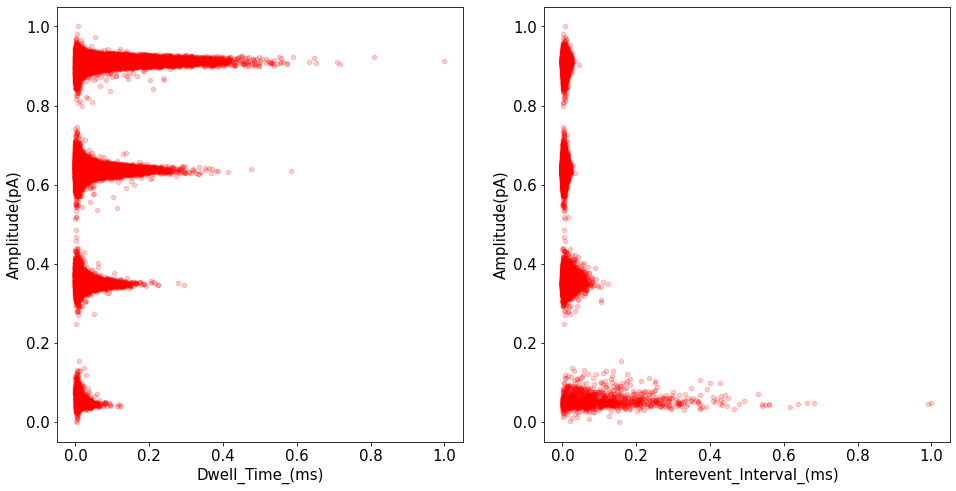

In [9]:

# defining a function for scaling the data:
def scale_data(col_name):
    scaler = MinMaxScaler()
    scaler.fit(data[[col_name]])
    data[col_name] = scaler.transform(data[col_name].values.reshape(-1,1))
    data.head()


# scaling the data using minmaxscaler
unscaled = ['Amplitude_(pA)', 'Dwell_Time_(ms)','Inst_Freq_(Hz)','Interevent_Interval_(ms)']# features to be scaled
for unscale in unscaled:
    scale_data(unscale)
#print(data.head())



# cosmetics
print('#'*100)
print()
print('Scatter plot of Normalized features')
print()
print('#'*100)

features = ['Dwell_Time_(ms)','Interevent_Interval_(ms)']


# Figure cosmetics
fig, axs = plt.subplots(1,len(features), figsize=(16,8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=.2)


for f, i in zip(features, range(len(features))):
    
    axs[i].scatter(data[f],data['Amplitude_(pA)'], s =20, c = 'r', alpha = 0.2)
    axs[i].set_xlabel(f,fontsize=15)
    axs[i].set_ylabel('Amplitude(pA)',fontsize=15)
    axs[i].tick_params(axis='x', labelsize= 15)
    axs[i].tick_params(axis='y', labelsize= 15)



# _____________________________________________________
# To determine optimal values of k (# of clusters) in the dataset

<Figure size 504x504 with 0 Axes>

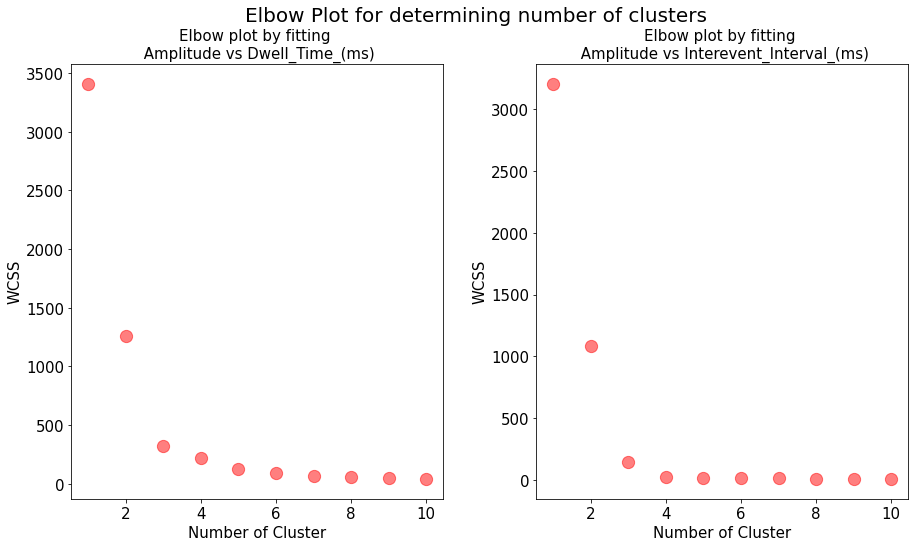

In [10]:
#################################### Elbow Method ########################################

x = ['Dwell_Time_(ms)','Interevent_Interval_(ms)']
y = data['Amplitude_(pA)']
fig = plt.figure(figsize = (7,7))
k_range = range(1,11)
WCSS = []  # within Cluster sum of squares
wcss_features = {}  # Building a dictionary which contins Elbow values for each feature of x

for feature in enumerate(x):
    X = pd.DataFrame(list(zip(data[feature[1]],y)), columns =[feature,'Amplitude'])
 
    for i in k_range:
        model = KMeans(n_clusters = i,init = 'k-means++',random_state=123)
        model.fit(X)
        WCSS.append(model.inertia_)
        # the nested for loop gives a flattend list 'wcss' for all the feature vector, so we try to split the list using the below 
        # idea to print individual graphs.
    wcss = WCSS[((feature[0])*10):(len(k_range)*(feature[0]+1))]
    #print(wcss)
    
    #Building a dataframe for each feacture of wcss
    wcss_features[feature[1]] = pd.DataFrame(wcss, columns = [feature[1]])
    #print("wcss_feature:\n",wcss_feature)

 # Figure cosmetics   
fig, axs = plt.subplots(1,len(x), figsize=(15,8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=.25)

fig.suptitle('Elbow Plot for determining number of clusters', fontsize = 20)
print('\n')


#looping through the disctionry wcss for plotting the elbow values for each feature.
for feature, j in zip(wcss_features, range(len(x))):
    axs[j].scatter(k_range,wcss_features[feature], s =150, c = 'r', alpha = 0.5)
    axs[j].set_xlabel('Number of Cluster',fontsize=15)
    axs[j].set_ylabel('WCSS',fontsize=15)
    axs[j].tick_params(axis='x', labelsize= 15)
    axs[j].tick_params(axis='y', labelsize= 15)
    axs[j].set_title('Elbow plot by fitting \n Amplitude vs {}'. format(feature),fontsize = 15)    

<Figure size 504x504 with 0 Axes>

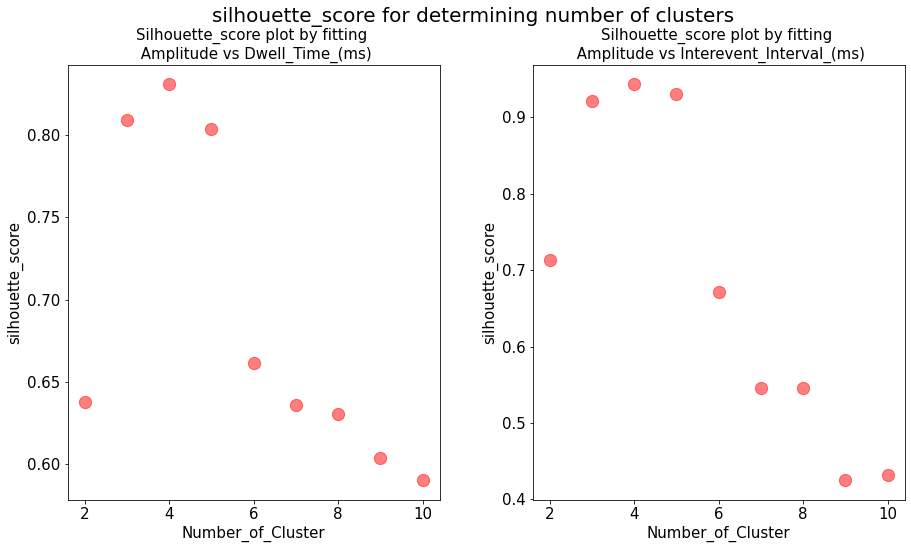

In [11]:
#################################### silhouette_score ########################################
x = ['Dwell_Time_(ms)','Interevent_Interval_(ms)']
y = data['Amplitude_(pA)']
fig = plt.figure(figsize = (7,7))
km_range = range(2,11)
km_silhouette = []
km_features = {}

for feature in enumerate(x):
    X = pd.DataFrame(list(zip(data[feature[1]],y)), columns =[feature,'Amplitude'])
 
    for i in km_range:
        km = KMeans(n_clusters = i,init = 'k-means++',random_state=123)
        km.fit(X)
        y_predict = km.fit_predict(X)
        sil_score = silhouette_score(X, y_predict, sample_size = 100, random_state = 123)
        
        km_silhouette.append(sil_score)
        # the nested for loop gives a flattend list 'wcss' for all the feature vector, so we try to split the list using the below 
        # idea to print individual graphs.
    sil = km_silhouette[((feature[0])*9):(len(km_range)*(feature[0]+1))]
    #print(sil)
      
    #Building a dataframe for each feacture of wcss
    km_features[feature[1]] = pd.DataFrame(sil, columns = [feature[1]])
    #print("wcss_feature:\n",wcss_feature)

    
fig, axs = plt.subplots(1,len(x), figsize=(15,8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=.25)

fig.suptitle('silhouette_score for determining number of clusters', fontsize = 20)
print('\n')

for feature, j in zip(km_features, range(len(x))):
    axs[j].scatter(km_range,km_features[feature], s =150, c = 'r', alpha = 0.5)
    axs[j].set_xlabel('Number_of_Cluster',fontsize=15)
    axs[j].set_ylabel('silhouette_score',fontsize=15)
    axs[j].tick_params(axis='x', labelsize= 15)
    axs[j].tick_params(axis='y', labelsize= 15)
    axs[j].set_title('Silhouette_score plot by fitting \n Amplitude vs {}'. format(feature),fontsize = 15) 

<Figure size 504x504 with 0 Axes>

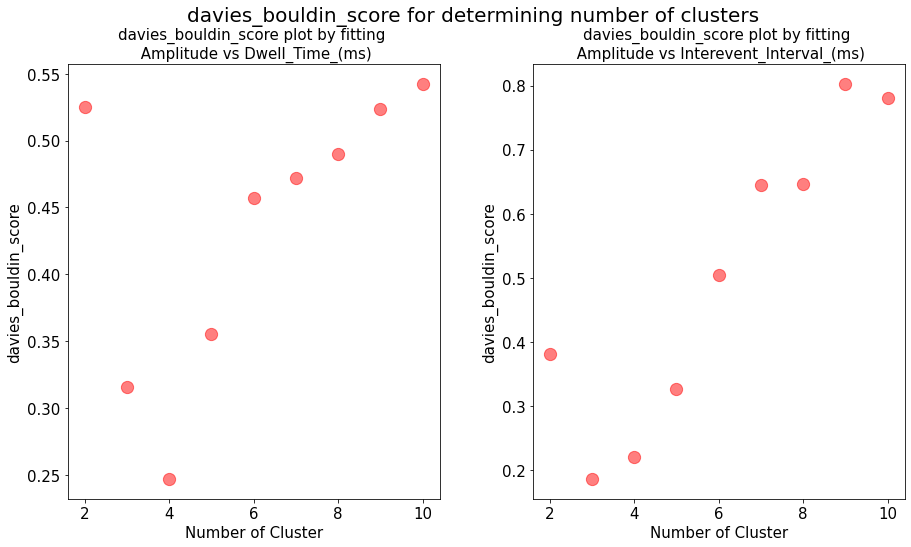

In [12]:
#################################### davies_bouldin_score ########################################
db_score = []
x = ['Dwell_Time_(ms)','Interevent_Interval_(ms)']

y = data['Amplitude_(pA)']
fig = plt.figure(figsize = (7,7))
km_range = range(2,11)

km_features = {}

for feature in enumerate(x):
    X = pd.DataFrame(list(zip(data[feature[1]],y)), columns =[feature,'Amplitude'])
 
    for i in km_range:
        km = KMeans(n_clusters = i,init = 'k-means++',random_state=123)
        km.fit(X)
        y_predict = km.fit_predict(X)
        davies_b_score = davies_bouldin_score(X, y_predict)
        
        db_score.append(davies_b_score)
        # the nested for loop gives a flattend list 'wcss' for all the feature vector, so we try to split the list using the below 
        # idea to print individual graphs.
    db = db_score[((feature[0])*9):(len(km_range)*(feature[0]+1))]
    #print(sil)
     
    #Building a dataframe for each feacture of wcss
    km_features[feature[1]] = pd.DataFrame(db, columns = [feature[1]])
    #print("wcss_feature:\n",wcss_feature)

    
fig, axs = plt.subplots(1,len(x), figsize=(15,8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=.25)

fig.suptitle('davies_bouldin_score for determining number of clusters\n', fontsize = 20)

print('\n')


for feature, j in zip(km_features, range(len(x))):
    axs[j].scatter(km_range,km_features[feature], s =150, c = 'r', alpha = 0.5)
    axs[j].set_xlabel('Number of Cluster',fontsize=15)
    axs[j].set_ylabel('davies_bouldin_score',fontsize=15)
    axs[j].tick_params(axis='x', labelsize= 15)
    axs[j].tick_params(axis='y', labelsize= 15)
    axs[j].set_title('davies_bouldin_score plot by fitting \n Amplitude vs {}'. format(feature),fontsize = 15)


# KMeans Model building

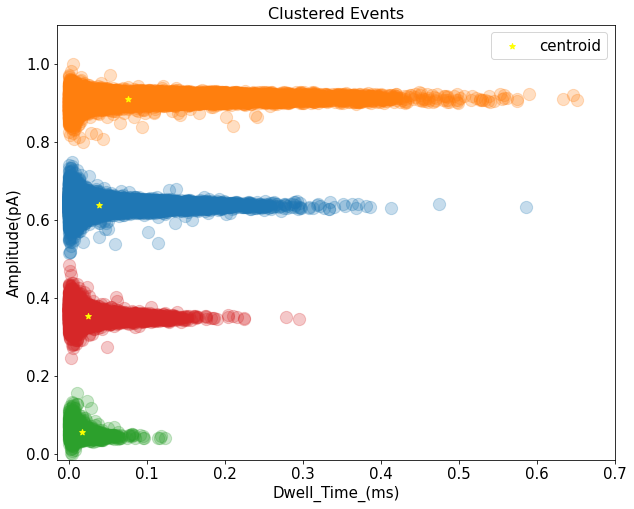

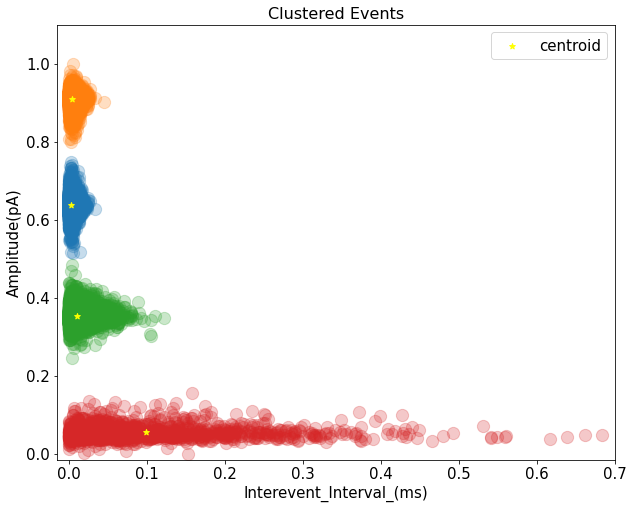

In [14]:
#Number of cluster initialization from the above scores
n_clusters = 4 

# Data to include in Kmeasn model building
x = ['Dwell_Time_(ms)','Interevent_Interval_(ms)']
y = data['Amplitude_(pA)']

# Creating an instance of a K Means Model with 4 clusters
for feature in x:
    X = pd.DataFrame(list(zip(data[feature],y)), columns =[feature,'Amplitude'])
    km = KMeans(n_clusters = 4,init = 'k-means++', random_state = 123).fit(X)
    y_predict = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, y_predict, sample_size = 100, random_state = 123)
    #print("For n_clusters =", n_clusters,"The average silhouette_score is :", float('{:.3f}'.format(silhouette_avg)))
    
    X['cluster']= y_predict
    #print(X)
     
    plt.figure(figsize=(10,8))
    
    
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    plt.title("Clustered Events",fontsize=16)
    
    for i, col in zip(range(n_clusters),colors):
        j = i+1
        dfj = X[X.cluster == i]
        #print(dfj)
        plt.scatter(dfj[feature], dfj['Amplitude'], color = col, s = 150, alpha = 0.25)
    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'yellow', marker ='*',label ='centroid')
    plt.xlabel(feature,fontsize=15)
    plt.ylabel('Amplitude(pA)',fontsize=15)
    plt.legend(fontsize = 15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlim(-0.015, 0.7)
    plt.ylim(-0.015,1.1)


##################################################################################################################

    for feature, j in zip(km_features, range(len(x))):
        axs[j].scatter(km_range,km_features[feature], s =50, c = 'r', alpha = 0.5)
        axs[j].set_xlabel('Number of Cluster',fontsize=15)
        axs[j].set_ylabel('davies_bouldin_score',fontsize=15)
        axs[j].tick_params(axis='x', labelsize= 15)
        axs[j].tick_params(axis='y', labelsize= 15)
        axs[j].set_title('davies_bouldin_score plot by fitting \n Amplitude vs {}'. format(feature),fontsize = 15)